<a href="https://colab.research.google.com/github/rucha04/example22/blob/main/5_K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kmeans Clustering 
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning

#### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#### Importing the data set 

In [ ]:
file = "winequality-red.csv"
data = pd.read_csv(file)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
pd.isnull(data).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the data set.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

We have 6 categories, hence k=**6**

### Polarizing the feature columns and dependent variable column

In [ ]:
X = data.drop("quality", axis=1)
y = data["quality"]

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [ ]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


### K means Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(n_clusters=6)

In [ ]:
clusters = kmeans.predict(X)
clusters

array([2, 2, 2, ..., 1, 2, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-7.48185194e-02,  2.81956972e-02,  7.86612459e-02,
        -1.74111543e-02, -3.47325911e-02,  1.01453742e+00,
         1.22878617e+00,  2.26953549e-01, -1.29556721e-01,
        -1.72363427e-01, -5.62046513e-01],
       [-6.92918829e-01, -4.34372506e-01, -1.51579663e-01,
        -2.56819880e-01, -4.16833031e-01,  1.15191886e-01,
        -2.43601332e-01, -1.23892827e+00,  6.37282376e-01,
         1.37939147e-01,  1.28997771e+00],
       [-4.71338545e-01,  6.90113488e-01, -8.21115359e-01,
        -1.91498399e-01, -6.00138041e-02, -4.32847578e-01,
        -4.09141538e-01, -5.15401664e-02,  4.10773808e-01,
        -3.96953730e-01, -4.24773445e-01],
       [ 9.54162998e-02,  2.19980305e-03,  1.18155266e+00,
        -3.89872163e-01,  5.78475973e+00, -4.95156003e-02,
         5.10329601e-01,  1.80071833e-01, -1.73579154e+00,
         3.66341219e+00, -8.69731260e-01],
       [ 1.33799383e+00, -6.73360431e-01,  1.12583206e+00,
         7.59583143e-02, -6.69548430e-03, -5.71834219e-01,
  

### Dimension reduction using PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pd.DataFrame(pca.fit_transform(X), columns=["PCA1","PCA2"])
centers_reduced = pd.DataFrame(pca.transform(kmeans.cluster_centers_), columns=["PCA1","PCA2"])
X_reduced

,PCA1,PCA2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791


In [ ]:
centers_reduced

,PCA1,PCA2
0,0.143813,1.490676
1,-1.323434,-1.019453
2,-1.059529,0.019835
3,3.599396,1.054984
4,2.092982,-0.997671
5,1.585715,3.620814


### Visualization 

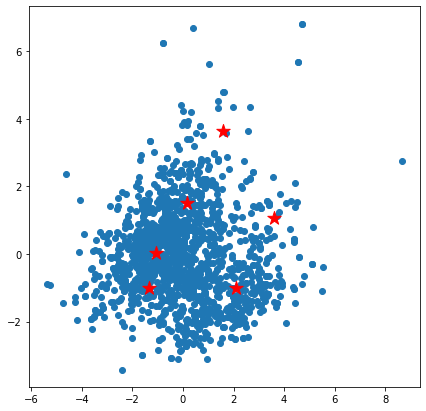

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(x=X_reduced["PCA1"] ,y=X_reduced["PCA2"])
plt.scatter(x=centers_reduced["PCA1"] ,y=centers_reduced["PCA2"], color= "red", marker="*", s=200)

In [ ]:
X_reduced["clusters"] = clusters
X_reduced

,PCA1,PCA2,clusters
0,-1.619530,0.450950,2
1,-0.799170,1.856553,2
2,-0.748479,0.882039,2
3,2.357673,-0.269976,4
4,-1.619530,0.450950,2
...,...,...,...
1594,-2.150500,0.814286,1
1595,-2.214496,0.893101,1
1596,-1.456129,0.311746,1
1597,-2.270518,0.979791,2


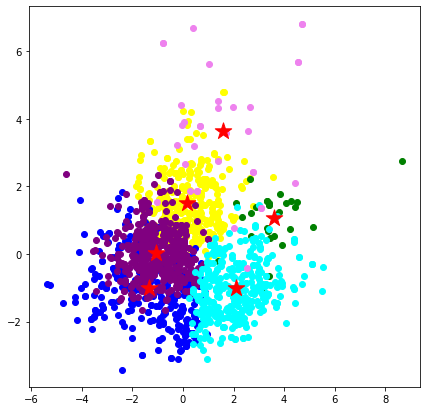

In [ ]:
plt.figure(figsize = (7,7))
plt.scatter(x=X_reduced[X_reduced["clusters"]==0]["PCA1"],y=X_reduced[X_reduced["clusters"]==0]["PCA2"], color="yellow")
plt.scatter(x=X_reduced[X_reduced["clusters"]==1]["PCA1"],y=X_reduced[X_reduced["clusters"]==1]["PCA2"], color="blue")
plt.scatter(x=X_reduced[X_reduced["clusters"]==2]["PCA1"],y=X_reduced[X_reduced["clusters"]==2]["PCA2"], color="purple")
plt.scatter(x=X_reduced[X_reduced["clusters"]==3]["PCA1"],y=X_reduced[X_reduced["clusters"]==3]["PCA2"], color="green")
plt.scatter(x=X_reduced[X_reduced["clusters"]==4]["PCA1"],y=X_reduced[X_reduced["clusters"]==4]["PCA2"], color="cyan")
plt.scatter(x=X_reduced[X_reduced["clusters"]==5]["PCA1"],y=X_reduced[X_reduced["clusters"]==5]["PCA2"], color="violet")
plt.scatter(x=centers_reduced["PCA1"] ,y=centers_reduced["PCA2"], color= "red", marker="*", s=300)

### Conclusion: Thus we have successfully completed the implementation of K means clustering.